<a href="https://colab.research.google.com/github/Hemashirisha/review_sentiment_analyser/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/drive/My Drive/archive.zip -d reviews

unzip:  cannot find or open /content/drive/My, /content/drive/My.zip or /content/drive/My.ZIP.


In [ ]:
cd /content/drive/My Drive

/content/drive/My Drive


In [ ]:
!unzip archive.zip -d reviews

Archive:  archive.zip
  inflating: reviews/IMDB Dataset.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/drive/My Drive/reviews/IMDB Dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

<BarContainer object of 2 artists>

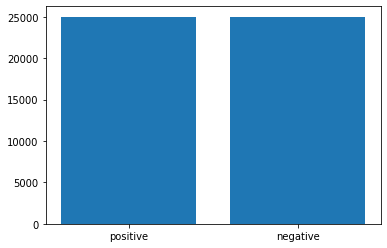

In [ ]:
plt.bar(df['sentiment'].value_counts().index,df['sentiment'].value_counts())

In [ ]:
from bs4 import BeautifulSoup
import re as re

In [ ]:
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result

In [ ]:
df['review']=df['review'].apply(lambda review : BeautifulSoup(review,"lxml").get_text())

In [ ]:
df['review'][578]

'This movie is so God-awful that it was literally a chore to watch. I wanted to eject it from my vcr and throw it across the room, but kept thinking (foolishly) that it would eventually get funny and then everything would be all right. "You lose, we win, yay!" This movie should be required viewing for anyone who even once entertained the thought that Jackie Mason was funny. After that, beat them ove the head with this movie until the tape cracks. And if you\'re even considering renting this turd (or worse yet, have!) I have one thing to ask of you: didn\'t you even look at the cover? I mean, with crap like this you can tell with just a glance how bad it is! "Oy vey!" This movie sucked.'

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string
def remove_punct(review):
    review_new="".join([c for c in review if c not in string.punctuation]).lower()

    review_new=re.sub('[0-9]+', '',review_new)
    return review_new

In [ ]:
df['review']=df["review"].apply(lambda review : remove_punct(review))

In [ ]:
df['review'][56]

'the hills have eyes ii is what you would expect it to be and nothing more of course its not going to be an oscar nominated film its just pure entertainment which you can just lose yourself in for  minutesthe plot is basically about a group of national guard trainees who find themselves battling against the notorious mutated hillbillies on their last day of training in the desert its just them fighting back throughout the whole film which includes a lot of violence which is basically the whole film as blood and guts are constantly flying around throughout the whole thing and also yet another graphic rape scene which is pointlessly thrown in to shock the audienceid give the hills have eyes ii  out of  for pure entertainment and that only although even then i found myself looking at my watch more and more as the film went on as it began to drag due to the fact it continued to try and shock the audience with graphic gore and the occasional jump scene just to make sure the audience stays a

In [ ]:
df['tokens']=df["review"].apply(lambda review : word_tokenize(review))

In [ ]:
df['tokens'].head()

0    [one, of, the, other, reviewers, has, mentione...
1    [a, wonderful, little, production, the, filmin...
2    [i, thought, this, was, a, wonderful, way, to,...
3    [basically, theres, a, family, where, a, littl...
4    [petter, matteis, love, in, the, time, of, mon...
Name: tokens, dtype: object

In [ ]:
def remove_stop_words(tokens):
    words=[t for t in tokens if t not in stopwords.words('english')]
    return words

In [ ]:
df['tokens']=df['tokens'].apply(lambda tokens : remove_stop_words(tokens))

In [ ]:
df['tokens'].head()

In [ ]:
df['review'].head()

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

In [ ]:

def word_lemmitizer(tokens):
    lemmatizer=WordNetLemmatizer()
    token_new=[lemmatizer.lemmatize(i) for i in tokens]
    return token_new
    

In [ ]:
df['tokens']=df['tokens'].apply(lambda token : word_lemmitizer(token))

In [ ]:
df['tokens'][0]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df.iloc[:,2]
y=df.iloc[:,1]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [ ]:
print(y_train.value_counts())

In [ ]:
print(y_test.value_counts())

In [ ]:
print(x.head())

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [ ]:

x_train=x_train.str.join(' ')


In [ ]:
review_model=Pipeline([('tfidf',TfidfVectorizer()),('model',MultinomialNB())])
review_model.fit(x_train,y_train)

In [ ]:
x_test=x_test.str.join(' ')
y_pred=review_model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,y_pred))
print("confusion matrix:")
confusion_matrix(y_test,y_pred)

In [ ]:
#testing with a random review
review="Parents need to know that The Star is an animated, faith-based take on the Nativity story that's told from the perspective of the animals that accompanied Mary and Joseph to Bethlehem. There's nothing too scary or iffy for young kids, except for a scene in which a big, scary animal charges people and other animals (no one is seriously hurt). There are also two intimidating attack dogs that end up temporarily incapacitated before they can do any harm, and a few other scenes of peril. King Herod is cruel and selfish, but he's clearly a bad guy -- as are the minions he sends after Mary and Joseph. Expect strong, clear messages about Christmas, family, and faith; obviously the movie aligns with the Christian belief in Jesus' virgin birth (although that detail isn't lingered on). It also has themes of compassion and integrity. Moviegoers of all backgrounds will recognize many of the voice actors (including Keegan-Michael Key, Oprah Winfrey, and Zachary Levi), but the film is likely to have the most appeal for Christian families."
review=remove_tags(review)
review=remove_punct(review)
review=word_tokenize(review)
review=remove_stop_words(review)
review=word_lemmitizer(review)
#review=review.join(' ')


In [ ]:
review=pd.Series(' '.join(review))

In [ ]:
review_model.predict(review)

In [ ]:
#another test for review
review2="Brutally gripping and brilliantly realistic, this is all that Airlift tried to be but couldn't. Not just the best Malayalam movie of the year, but one of the best of the year overall. Parvathy amazes with each role she takes up, every one of them different from the other, and she carries this movie on her able shoulders. Fahad Fazil, Kunchako Boban and others provide admirable support, but the biggest kudos should go to the director here. Based on the incident where Indian nurses in Iraq were kidnapped by Isis, and their eventual release, this movie deserves as wide an audience as it can get, and Parvathy and its director deserve all the accolades they can get for it."

In [ ]:
review=remove_tags(review2)
review=remove_punct(review)
review=word_tokenize(review)
review=remove_stop_words(review)
review=word_lemmitizer(review)
review=pd.Series(' '.join(review))
review_model.predict(review)

In [ ]:
df.to_csv('review_data.csv')
!cp review_data.csv "drive/My Drive/"